In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Classwork 05

YourNameHere

DateHere

## Defining Mathematical Functions

The following code shows features of numpy for rapidly implementing discrete approximations of mathematical functions.

In [2]:
def gaussian(x):
    """gaussian(x)
    
    Normalized Gaussian function, also known as a normal distribution, or a bell curve.
    """
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

def lorentzian(x):
    """lorentzian(x)
    
    Normalized Lorentzian function, also known as a Cauchy distribution, or a resonance linewidth.
    """
    return (1/np.pi)/(1 + x**2)

def sigmoid(x):
    """sigmoid(x)
    
    Sigmoid function, used to simulate neuron activation in neural networks.
    """
    return 1/(1 + np.exp(-x))

def sinc(x):
    """sinc(x)
    
    Sinc function, appears in single-slit diffraction, and is Fourier transform of a tophat function.
    """
    # Avoids division by zero by defaulting to the value 1
    return np.divide(np.sin(x), x, out=np.ones_like(x), where=(x!=0))

def raisedcosine(x):
    """raisedcosine(x)
    
    Raised cosine distribution, has compact support but similar to bell curve.
    """
    # Efficient conditional evaluation across array
    return np.where(np.abs(x) < np.pi, (1 + np.cos(x))/(2*np.pi), 0)

Note that the python function definitions are type agnostic: the parameter `x` could be any type, and the code will run provided that the expressions inside the function are compatible with that type. This type-agnosticism of python is often called "duck typing", since if it walks like a duck, and quacks like a duck, python will think it is a duck. For the cases above, functions that rely only on array broadcasting and vectorization will have the operations will work correctly when `x` is a float, or when `x` in an array as floats. This is one of the main reasons that broadcasting and vectorization are given no special syntax in numpy.

In [3]:
[f(1.24) for f in [gaussian, lorentzian, sigmoid]]  # evaluation on a float

[0.18493728096330531, 0.125437376333461, 0.7755640142690734]

In [4]:
[f(np.linspace(-1,1,3)) for f in [gaussian, lorentzian, sigmoid]] # evaluation on an array

[array([ 0.24197072,  0.39894228,  0.24197072]),
 array([ 0.15915494,  0.31830989,  0.15915494]),
 array([ 0.26894142,  0.5       ,  0.73105858])]

The remaining two functions use features specific to numpy arrays, so will autoconvert a float input to an array output.

In [5]:
[f(1.24) for f in [sinc, raisedcosine]] # numpy specialized evaluation on a float

[array(0.7627290318141443), array(0.2108478772582078)]

Make sure you understand the concepts of broadcasting and vectorization for arrays. Explain those concepts in your own words below, and use code examples to illustrate your descriptions.

In [6]:
# Broadcasting explanation and example

# Vectorization explanation and example

## Plotting Functions

### Lazy Plotting with Dataframes

For quick plots, it is convenient to neatly package all function range data together with their common domain data. Pandas dataframes are ideally suited for such data organization. Dataframes also provide a simple plot interface to quickly generate plots.

In [7]:
def make_plots(a=-10,b=10,n=1000):
    # Generate n domain points equally spaced to cover the interval [a,b]
    x = np.linspace(a,b,n)
    
    # Collect function range points corresponding to domain points
    fs = pd.DataFrame({"x":x
                     ,"gaussian":gaussian(x)
                     ,"lorentzian":lorentzian(x)
                     ,"sigmoid":sigmoid(x)
                     ,"sinc":sinc(x)
                     ,"raisedcosine":raisedcosine(x)
                     })
    
    # Plot all range points with respect to same domain points x
    fs.plot(x='x')

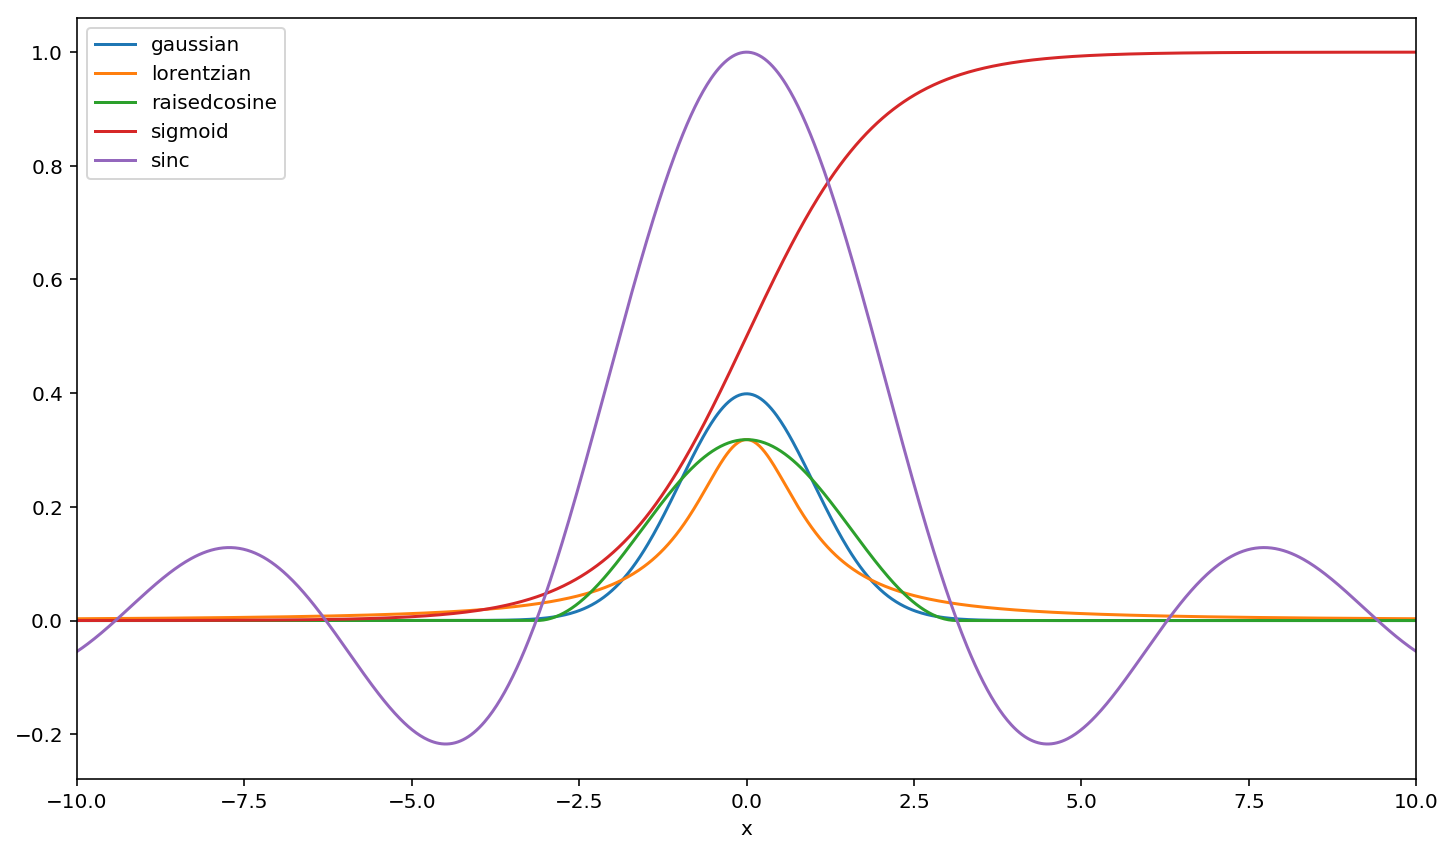

In [8]:
make_plots()

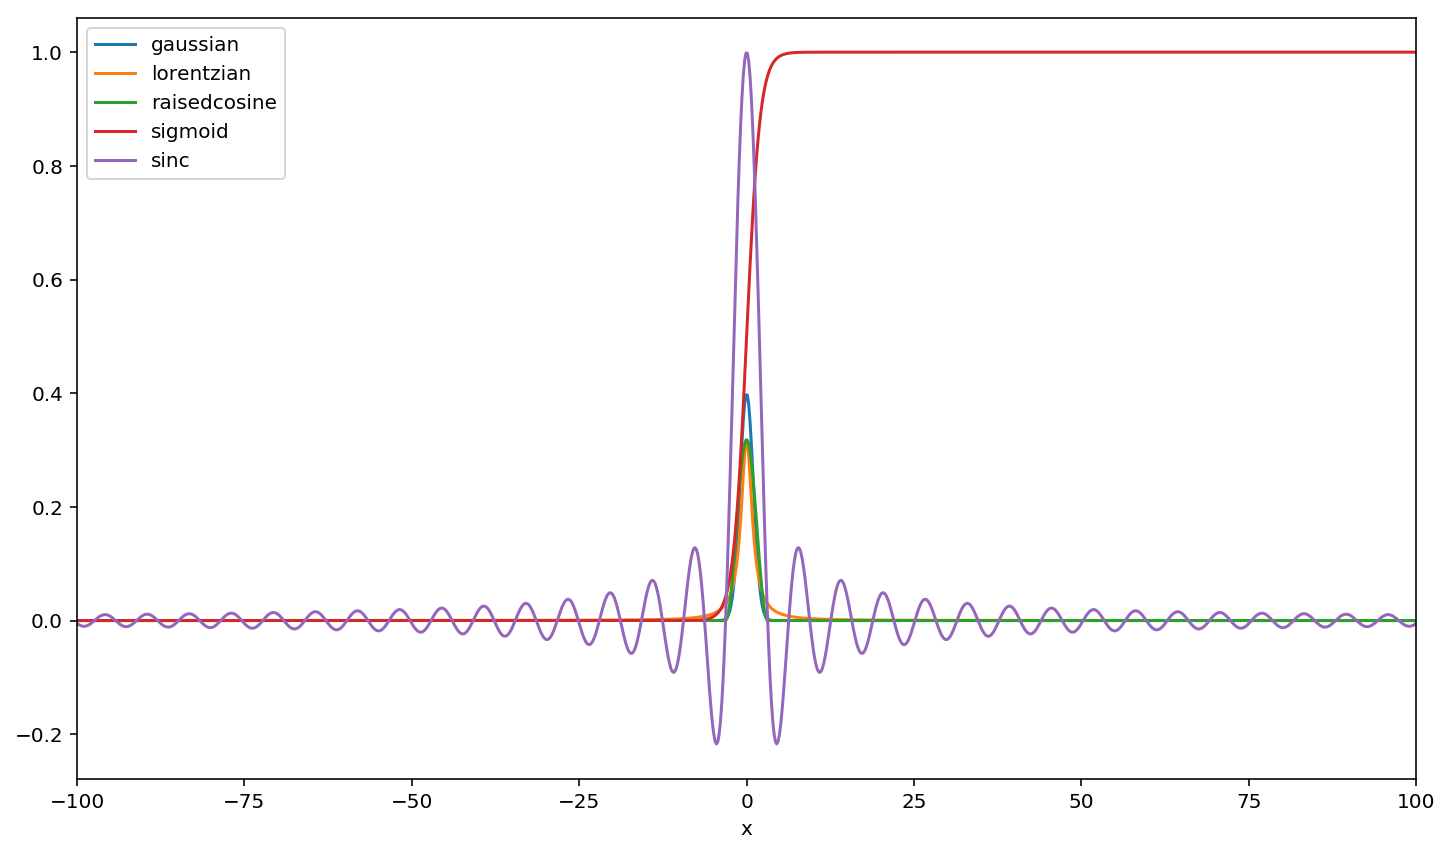

In [9]:
make_plots(a=-100,b=100)

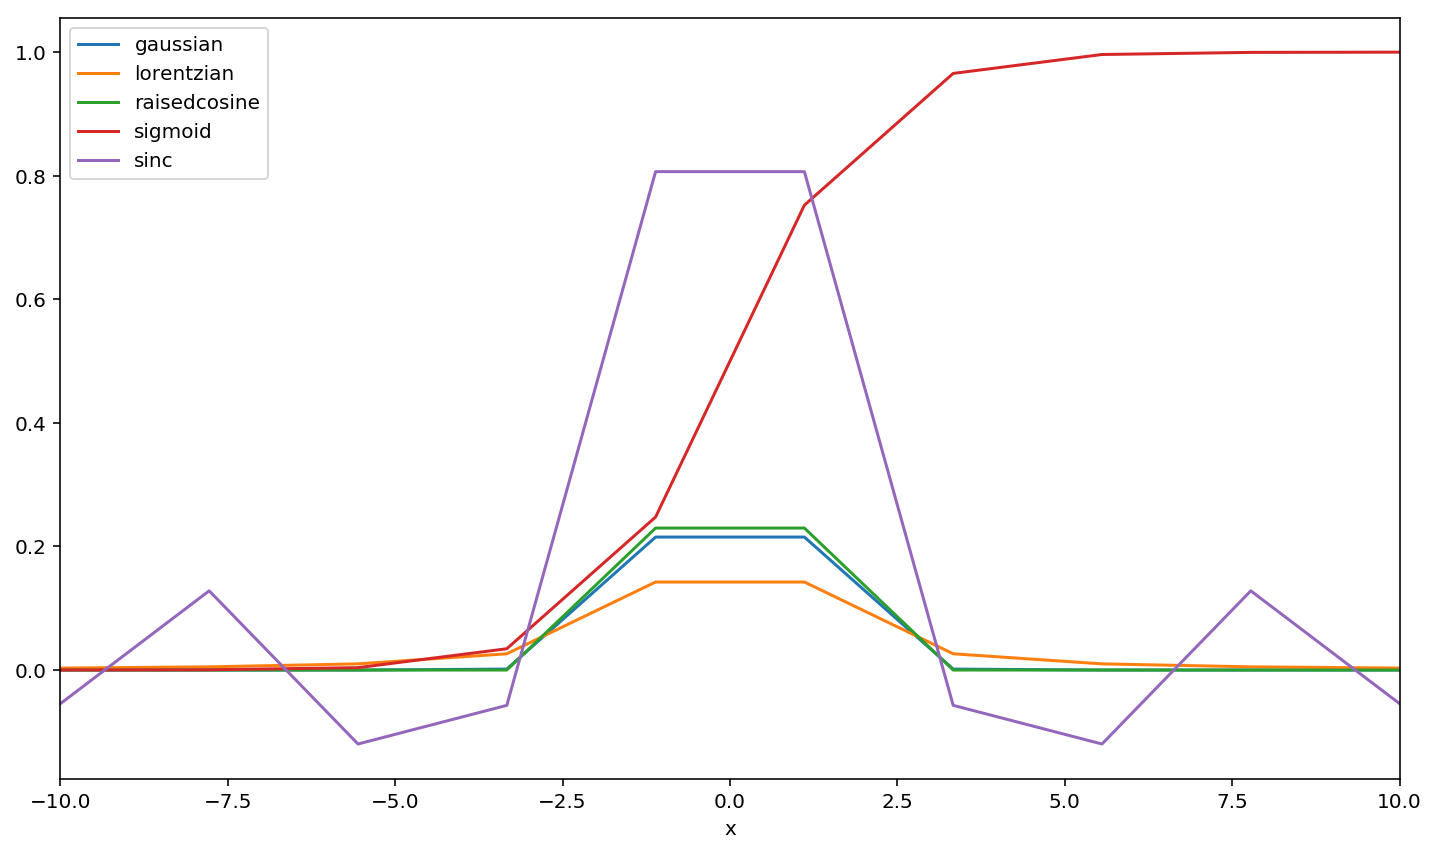

In [10]:
make_plots(n=10)

## Plotting with Matplotlib

Use `matplotlib.pyplot` to generate a plot comparing the Gaussian function, Lorentzian function, and raised cosine function in more detail. Plot the Gaussian in blue, the Lorentzian in red, and the raised cosine in green. Make the Gaussian solid, the Lorentzian dashed, and the raised cosine dotted. Create a legend that labels each curve. Resize the tickmarks to be double the default size. Label the x axis as "x" and double the default font size. Create a plot title of "Distribution comparison". Annotate the plot with a point on each curve at $x=\pi$, with an arrow pointing to one of the points with a label of $\pi$.

After you handle the 1d case, create separate 2d plots of each function by interpreting the "x" value of each function as the radius away from the origin in a 2d plane (so that each 2d function is symmetric under rotations around the origin in the plane).

The following resources may be helpful:
  - https://www.labri.fr/perso/nrougier/teaching/matplotlib/
  - http://matplotlib.org/gallery.html

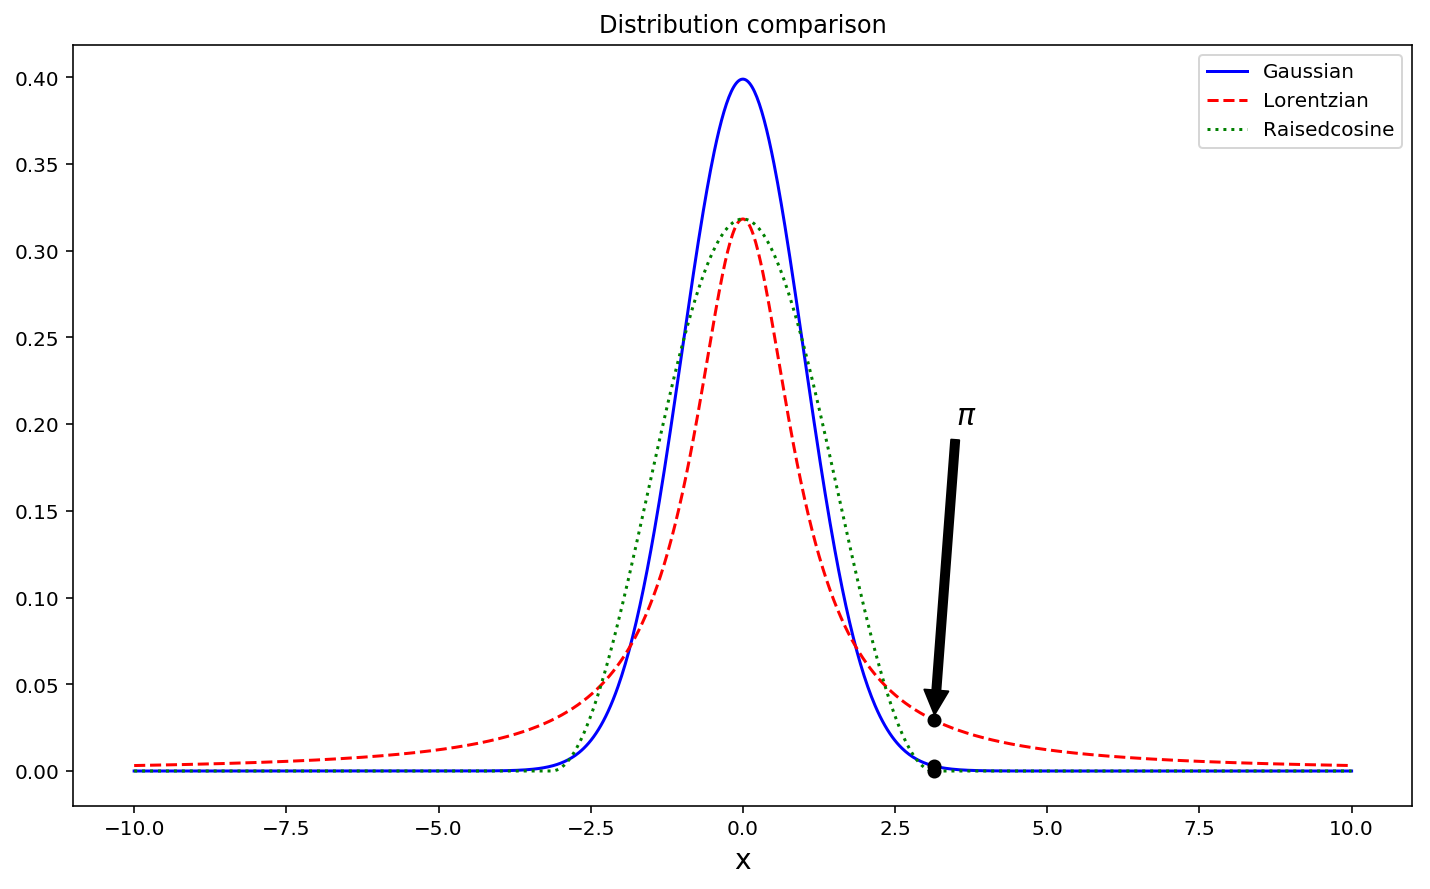

In [19]:
X = [f(np.linspace(-10,10,1000)) for f in [gaussian, lorentzian, raisedcosine]]
G = X[0]
L = X[1]
R = X[2]
plt.plot(np.linspace(-10,10,1000),G,"b-")
plt.plot(np.linspace(-10,10,1000),L,"r--")
plt.plot(np.linspace(-10,10,1000),R,"g:")
plt.xlabel('x', fontsize = 14)
t = np.pi
plt.annotate('$\pi$',
             xy = (t, lorentzian(t)),
             xytext = (3.5,.2),
             arrowprops = dict(facecolor='black', shrink = 0.02),
             fontsize = 15)
plt.plot(t,gaussian(t),'ko')
plt.plot(t,lorentzian(t),'ko')
plt.plot(t,raisedcosine(t),'ko')
plt.title('Distribution comparison')
plt.legend(['Gaussian','Lorentzian','Raisedcosine'])
plt.show()

## Plotting with Seaborn

Seaborn is a statistical plotting extension to Matplotlib that uses nicer visual defaults for common data-processing tasks. Consider the following code fragment that generates a set of random points sampled from a normalized Gaussian distribution and generates a histogram of the data. The blue curve is the estimated continuous distribution function that is consistent with the sampled data. The red curve is the Gaussian function defined above. Show by increasing the parameter `n` that collecting more samples improves the estimate to converge to the actual Gaussian being used to generate the data. How many samples are required before the distribution convincingly converges?

In [12]:
#Gaussian
def gaussian_sample(n):
    # Generate random n
    points = np.random.randn(n)
    #make domain
    x = np.linspace(-5,5,100)
    # Plot
    plt.figure(1)
    plt.title("Gaussian sampling")
    plt.xlabel("x")
    plt.plot(x,gaussian(x),label="gaussian",color="red")
    #generate histogram and estimate distribution
    sb.distplot(points,label="data",color="blue",kde_kws={"label":"estimate"})
    # Label curves
    plt.legend()

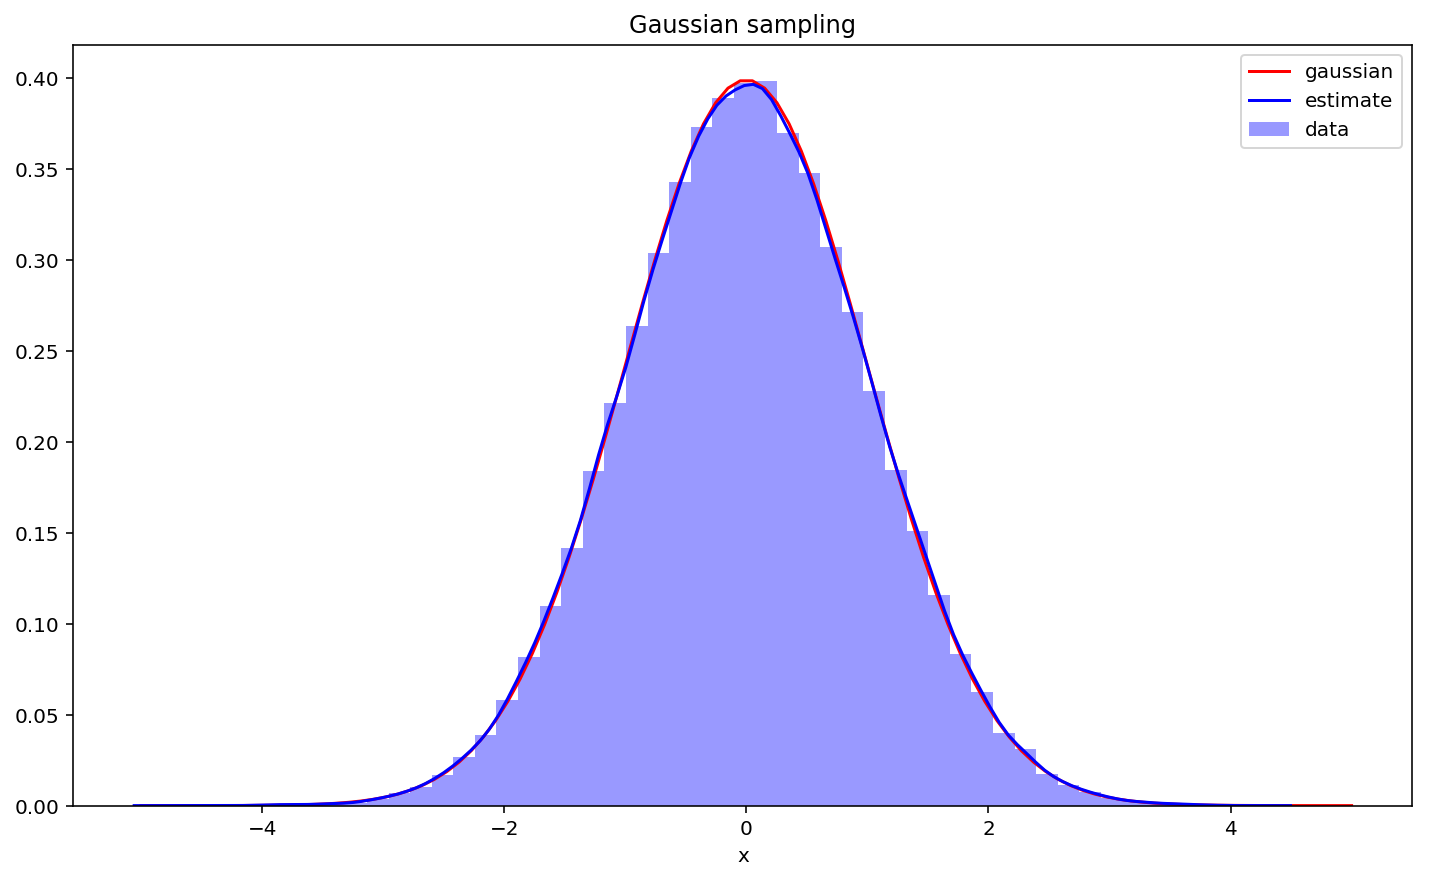

In [13]:
gaussian_sample(100000)

Repeat the above analysis for the Lorentzian distribution (see `numpy.random.standard_cauchy` for sampling Lorentzian-distributed random numbers). How many samples do you need to show convergence to the distribution? Speculate why there is a difference between the Gaussian and Lorentzian cases.

In [14]:
# Lorentzian
def lorentzian_sample(n):
    # Generate random n floats
    n = 100000
    # The greater the n, the more accurate the data will be
    points = np.random.randn(n)
    # Create domain
    x = np.linspace(-4,4,100)
    # Plot
    plt.figure(1)
    plt.title("Lorentzian sampling")
    plt.xlabel("x")
    plt.plot(x,lorentzian(x),label="lorentzian",color="red")
    # Use seaborn to generate histogram and estimate distribution
    sb.distplot(points,label="data",color="blue",kde_kws={"label":"estimate"})#idk what this does
    # Label curves
    plt.legend()

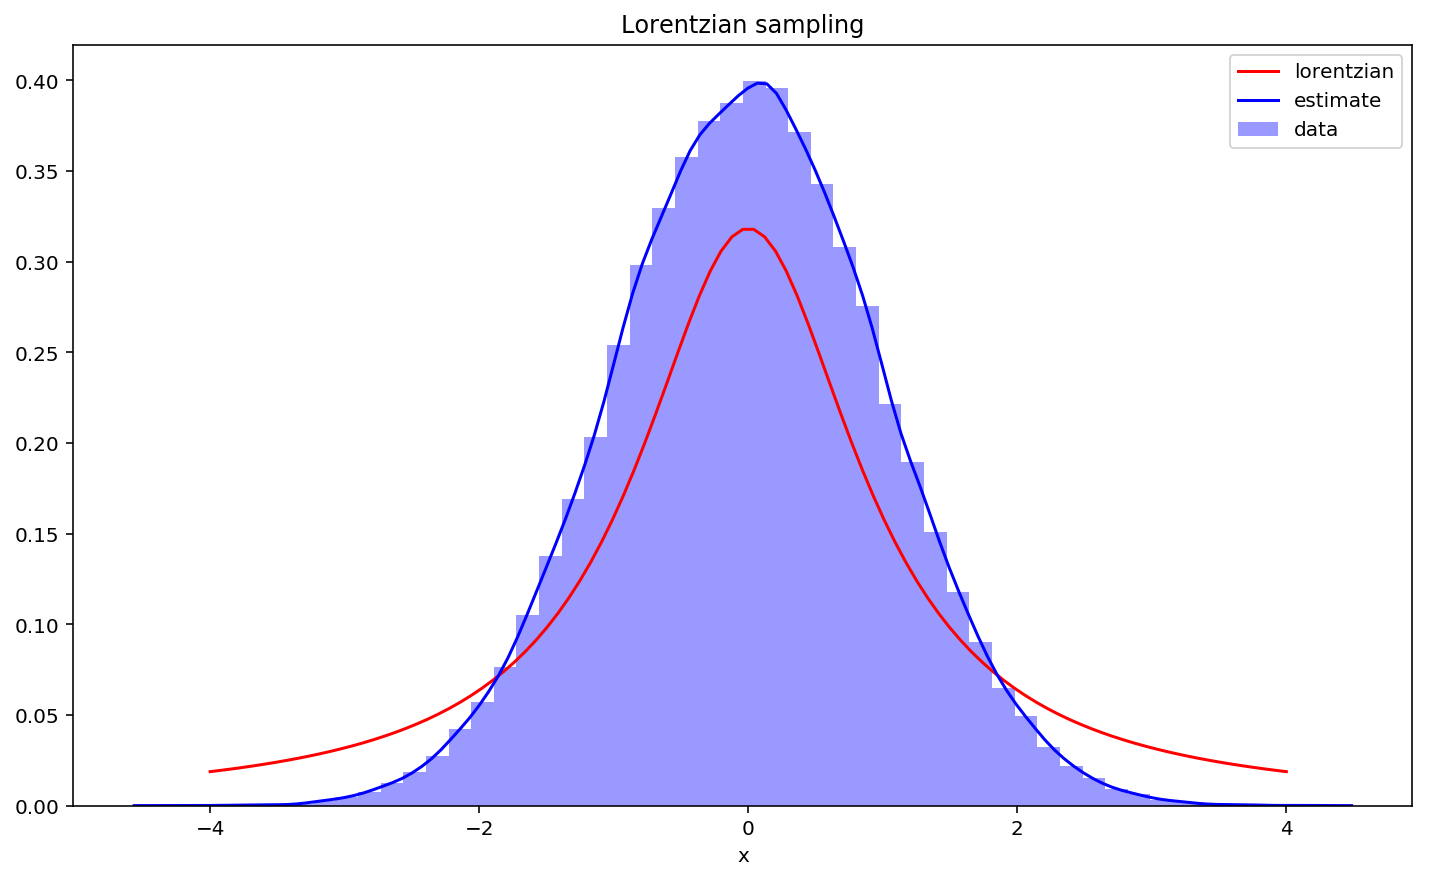

In [15]:
lorentzian_sample(10)

Seaborn is extremely powerful for manipulating statistics and processing data points. For more examples see:
  - https://seaborn.pydata.org/examples/index.html